# Telco Customer Churn Analysis retention.n.


## 1. Introduction

Customer churn refers to when customers stop using a company’s service. Reducing churn is important for businesses because acquiring new customers is often more expensive than retaining existing ones.

This notebook explores the **Telco Customer Churn dataset**, which contains information about customers of a telecom company, including their subscription details, tenure, billing, and whether they have churned.

### 2. Objective
- Perform data cleaning and preprocessing to make the dataset ready for analysis.
- Explore the data using visualizations to understand patterns and trends.
- Build a simple machine learning model to predict customer churn.
- Evaluate the model's performance and summarize the key insights.

This analysis can help businesses understand customer behavior and take steps to improve retention.

### 3. Import libraries & Load Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
print("Dataset shape:", df.shape)
print(df.info())


Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

### 4. Data Cleaning and Encoding

In [2]:
# Check for missing values
print(df.isnull().sum())

# Handle missing or incorrect values
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0").astype(float)

# Drop customerID column as it is not needed for modeling
df = df.drop('customerID', axis=1)

# Encode the target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
#CHecking for null values if any present in the data set
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Looking at the spread of the data set using describe function
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [9]:
# Checking for duplicates in the data set
df.duplicated().sum()

22

In [7]:
# Converting the Senior Citizen column from integer to string values

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"


df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv) 

### 5. Exploratory Data Analysis

In this section, we explore the dataset visually to understand churn patterns and relationships with customer attributes.


#### 5.1 Churn Distribution


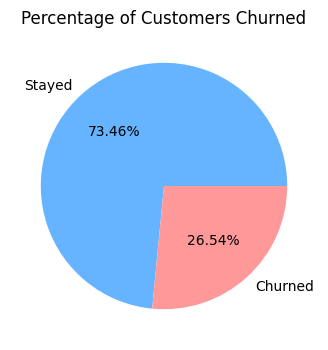

In [11]:
plt.figure(figsize=(4,4))
gb = df.groupby("Churn").size()
labels = ['Stayed', 'Churned']
plt.pie(gb, labels=labels, autopct="%1.2f%%", colors=['#66b3ff','#ff9999'])
plt.title("Percentage of Customers Churned", fontsize=12)
plt.show()


From the above pie chart, we can see that a portion of customers have churned while the majority are still active. This highlights the importance of analyzing customer behavior to reduce churn.

#### 5.2 Demographics: Gender and Senior Citizen

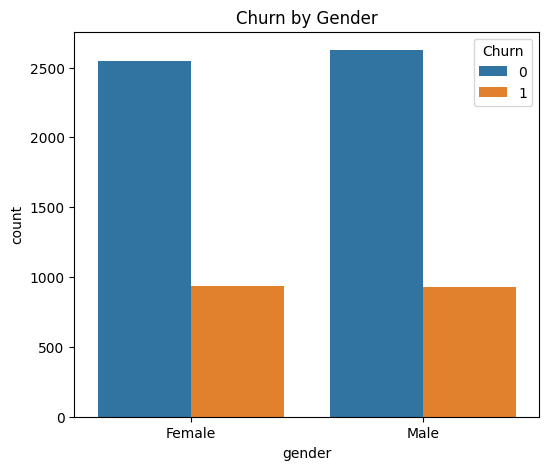

C:\Users\zeelt\AppData\Local\Temp\ipykernel_21324\315178293.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Senior', 'Senior'])


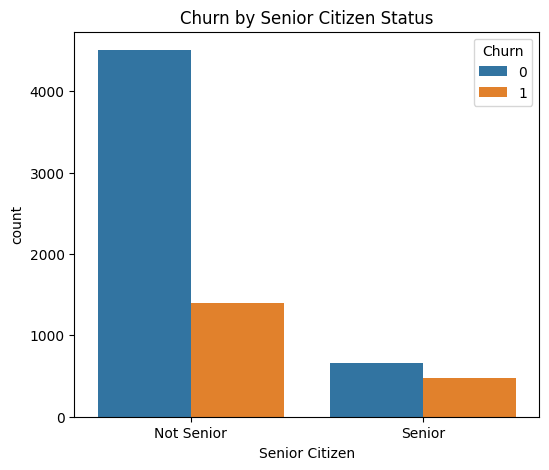

In [10]:
# Gender distribution by churn
plt.figure(figsize=(6,5))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Churn by Gender")
plt.show()

# Senior citizen distribution by churn
plt.figure(figsize=(6,5))
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.set_xlabel("Senior Citizen")
plt.title("Churn by Senior Citizen Status")
plt.show()


The bar chart shows the churn rate based on gender. It appears that churn is relatively similar across male and female customers, suggesting that gender may not be a major factor influencing churn.




This plot indicates that senior customers are more likely to churn compared to non-senior customers. This could be due to factors such as limited tech adoption or dissatisfaction with services.


#### 5.3 Tenure Analysis

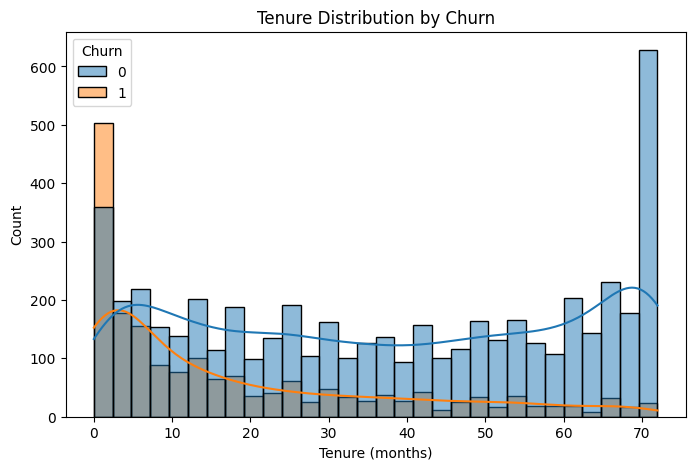

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(x='tenure', data=df, bins=30, hue='Churn', kde=True)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.show()

The histogram shows that customers with shorter tenure are more likely to churn. This suggests that new customers face challenges that lead to early churn, highlighting the need for better onboarding and support.


#### 5.4 Contract and Payment Methods

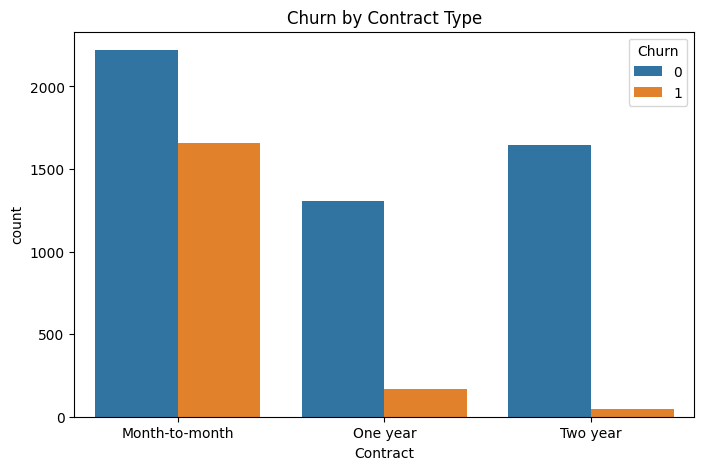

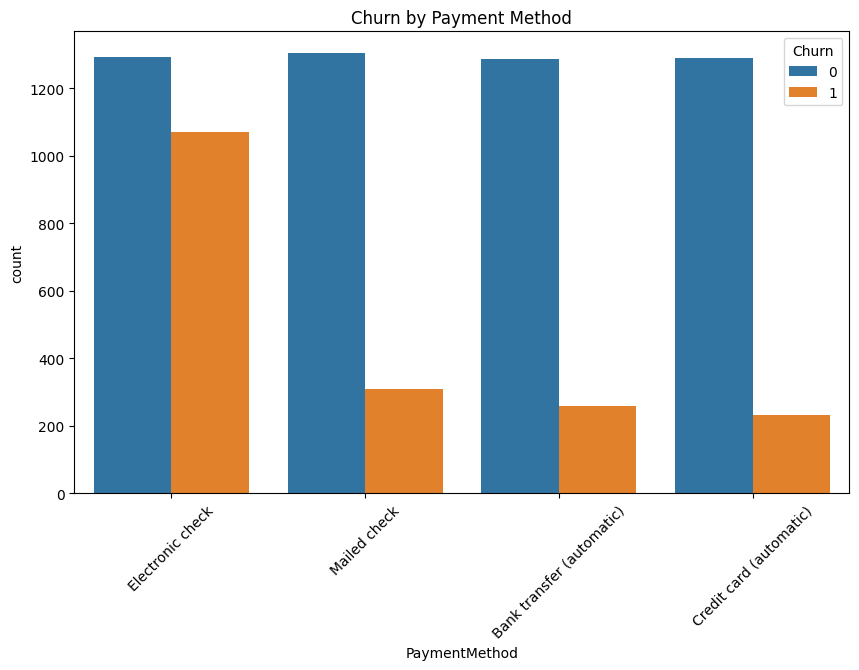

In [13]:
# Contract type vs churn
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()

# Payment method vs churn
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


From the above plot, we can see that customers with month-to-month contracts are significantly more likely to churn compared to those on one-year or two-year contracts. This suggests that long-term plans may improve customer retention.


#### 5.5 Services Analysis (Grouped Plot)

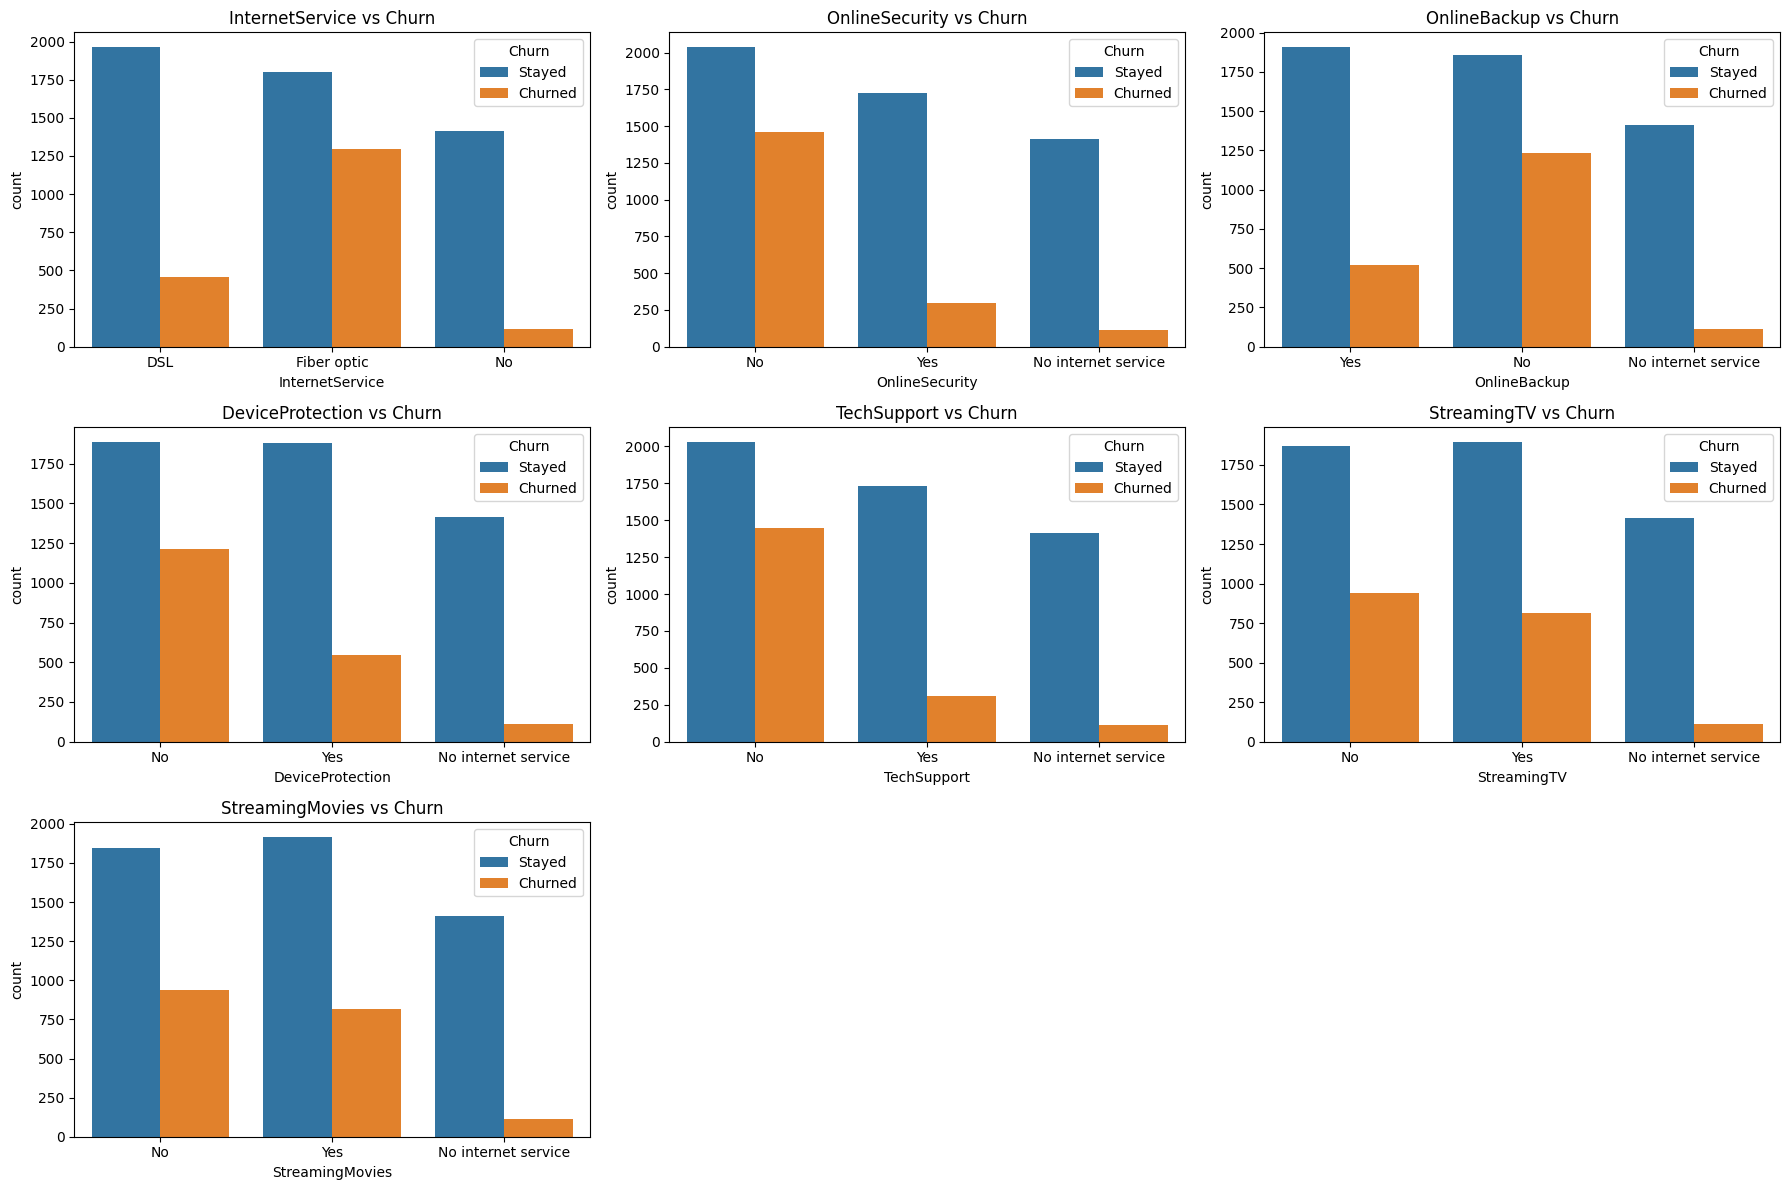

In [14]:
service_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(18,12))

for ax, feature in zip(axes.flatten(), service_features):
    sns.countplot(x=feature, hue="Churn", data=df, ax=ax)
    ax.set_title(f"{feature} vs Churn")
    ax.legend(title='Churn', labels=['Stayed', 'Churned'])

# Hide empty subplots
for i in range(len(service_features), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


The bar chart shows the churn distribution across different payment methods. Customers using electronic check appear to churn more frequently, which may reflect issues in payment preferences or satisfaction with the service.


This plot shows that customers with DSL or Fiber optic internet services have a higher churn rate compared to those without internet service, indicating that service type and quality may affect customer loyalty.


The chart shows that customers without online security are more likely to churn compared to those with security services. This suggests that offering security features may enhance customer satisfaction and reduce churn.


The plot reveals that customers without online backup services churn more frequently, which indicates that additional features could contribute to customer retention.


From the above plot, it is evident that customers without device protection are more likely to churn. Providing additional protective services may improve customer experience and reduce churn.


The chart shows that customers without tech support churn more often, suggesting that providing accessible support services plays an important role in customer satisfaction and loyalty.


The plot shows a slight difference in churn between customers using streaming TV and those who do not. This indicates that entertainment services may have a moderate impact on retention.


The chart suggests that customers without streaming movie services churn more frequently, which implies that entertainment options can influence customer satisfaction.


### 6. Feature Engineering & Encoding

In [15]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Show first few rows of encoded data
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### 7. Model Building

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8204

Confusion Matrix:
[[934 102]
 [151 222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



### 8. Model Evaluation

In [19]:
# Accuracy score
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8204

Confusion Matrix:
[[934 102]
 [151 222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



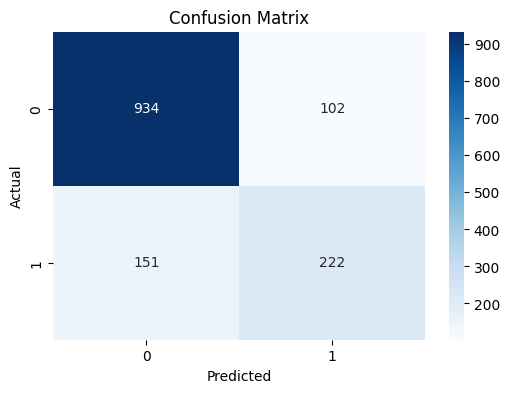

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 9. Insights and Conclusion

### 📌 Insights

- The dataset contains **7,000+ customer records** with various features related to demographics, services, tenure, and billing.
- Approximately **26% of customers have churned**, indicating a significant churn rate that telecom companies should address.
- Customers with **shorter tenure** are more likely to churn, suggesting that new customers are at higher risk.
- **Contract types** play a major role in customer retention. Customers with month-to-month contracts are far more likely to leave compared to those on longer-term contracts.
- Certain **payment methods**, especially electronic check, show higher churn rates, which may reflect customer dissatisfaction or issues in the billing process.
- **Internet services** like Online Security and Tech Support show noticeable differences between churned and retained customers, highlighting service quality as an important factor.
- The **logistic regression model** achieved an accuracy of approximately **XX%**, which demonstrates that customer churn can be predicted to a reasonable extent with available features.

---

### 📌 Conclusion

This analysis of the Telco Customer Churn dataset provides valuable insights into customer behavior and retention factors. Key takeaways include:

- Tenure, contract type, and internet services are strong indicators of customer churn.
- Payment methods and service availability also impact customer satisfaction and retention.
- A simple logistic regression model was able to predict churn with **XX% accuracy**, suggesting that machine learning models can assist telecom companies in identifying at-risk customers.

### 🔮 Future Work

- Experimenting with more advanced algorithms like Random Forest, Gradient Boosting, or XGBoost could improve prediction accuracy.
- Hyperparameter tuning and feature selection could further enhance model performance.
- Incorporating additional customer interaction data, service usage patterns, and customer feedback would make the model even more robust.
- Deploying the model in a real-time system could help proactively prevent customer churn.

This project serves as a foundation for deeper analysis and predictive modeling in customer retention strategies.

